In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train data credit card.csv")
data.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


# Check correlation wrt independent features

In [3]:
# divide data into x & y

data.drop("ID", axis = 1, inplace = True)

In [4]:
data.head(2)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0


In [5]:
X = data.drop("Is_Lead", axis = 1) # independent feature
Y = data["Is_Lead"]

In [6]:
X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
dtypes: int64(3), object(6)
memory usage: 16.9+ MB


In [8]:
X.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [9]:
X = X.fillna("Pending")

In [10]:
X.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [11]:
X.Credit_Product.value_counts()

No         144357
Yes         72043
Pending     29325
Name: Credit_Product, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [14]:
categorical_col = X.select_dtypes(include = "object").columns

In [15]:
categorical_col = X.select_dtypes(include = "object").columns
for col in categorical_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0
...,...,...,...,...,...,...,...,...,...
245720,1,51,34,3,2,109,1,1925586,0
245721,1,27,18,2,0,15,0,862952,1
245722,0,26,31,2,0,13,0,670659,0
245723,0,28,23,2,0,31,0,407504,0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               245725 non-null  int32
 1   Age                  245725 non-null  int64
 2   Region_Code          245725 non-null  int32
 3   Occupation           245725 non-null  int32
 4   Channel_Code         245725 non-null  int32
 5   Vintage              245725 non-null  int64
 6   Credit_Product       245725 non-null  int32
 7   Avg_Account_Balance  245725 non-null  int64
 8   Is_Active            245725 non-null  int32
dtypes: int32(6), int64(3)
memory usage: 11.2 MB


In [17]:
X.Credit_Product.value_counts()

0    144357
2     72043
1     29325
Name: Credit_Product, dtype: int64

In [46]:
X.corr().columns # Pearson --> -1 , +1

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

<AxesSubplot:>

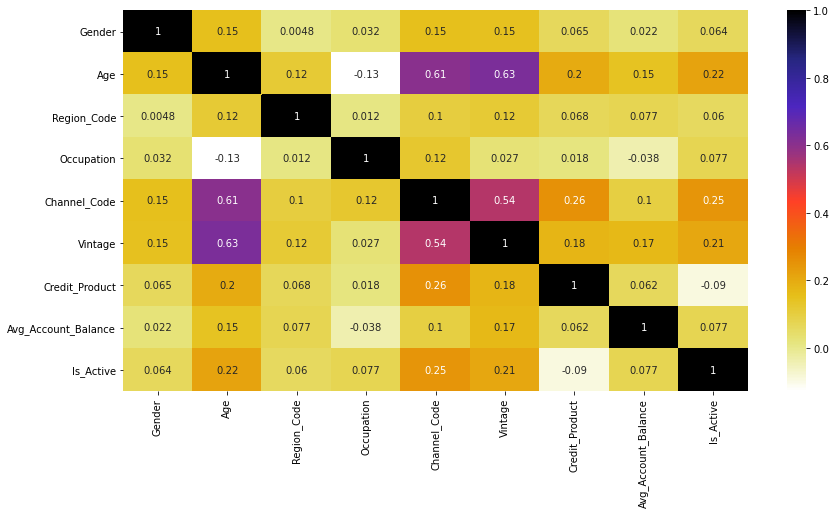

In [35]:
# steps:
# 1. Gender --> high value 


import seaborn as sns

plt.figure(figsize = (14,7))
corr = X.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)

In [40]:
def correlation(dataset, threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(0,len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i] # name of correlated column threshold>60
                corr_col.add(col_name)
    return corr_col

In [42]:
corr_feature = correlation(X, 0.6)
print(corr_feature)

{'Vintage', 'Channel_Code'}


In [43]:
X.drop(list(corr_feature), axis = 1, inplace = True)

In [45]:
X.shape

(245725, 7)

# Feature Selection - Dropping the Constant Features

In [47]:
new_data = {"A" : [4,5,6,7],
           "B" : [1,2,4,5],
           "C" : [0,0,0,0],
           "D" : [1,1,1,1]}

df = pd.DataFrame(new_data)
df # C & D --< constant feature

,A,B,C,D
0,4,1,0,1
1,5,2,0,1
2,6,4,0,1
3,7,5,0,1


In [48]:
from sklearn.feature_selection import VarianceThreshold

In [49]:
vt = VarianceThreshold(threshold = 0.25) # threshold = 0.01 --> means dropping column where 99% values are similar

In [50]:
vt.fit(df)

VarianceThreshold(threshold=0.25)

In [51]:
vt.get_support()

array([ True,  True, False, False])

In [55]:
zero_var_col = list(df.columns[vt.get_support() == False])
print(zero_var_col)

['C', 'D']


In [56]:
df.drop(zero_var_col, axis = 1, inplace = True)

In [57]:
df

,A,B
0,4,1
1,5,2
2,6,4
3,7,5


In [58]:
my_data = pd.read_csv("train data credit card.csv")
my_data.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


In [59]:
# drop id

my_data.drop("ID", axis = 1, inplace = True)

In [60]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [61]:
X = my_data.drop("Is_Lead", axis = 1)
Y = my_data["Is_Lead"]

In [62]:
categorical_col = X.select_dtypes(include = "object").columns
for col in categorical_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0
...,...,...,...,...,...,...,...,...,...
245720,1,51,34,3,2,109,2,1925586,0
245721,1,27,18,2,0,15,0,862952,1
245722,0,26,31,2,0,13,0,670659,0
245723,0,28,23,2,0,31,0,407504,0


In [63]:
var_thesh = VarianceThreshold(threshold = 0.25)

In [64]:
var_thesh.fit(X)

VarianceThreshold(threshold=0.25)

In [65]:
var_thesh.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True, False])

In [68]:
zero_var_col = list(X.columns[var_thesh.get_support() == False])
print(zero_var_col)

['Gender', 'Is_Active']


In [69]:
X.drop(zero_var_col, axis = 1, inplace = True)

In [70]:
X

,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance
0,73,18,1,2,43,0,1045696
1,30,27,2,0,32,0,581988
2,56,18,3,2,26,0,1484315
3,34,20,2,0,19,0,470454
4,30,32,2,0,33,0,886787
...,...,...,...,...,...,...,...
245720,51,34,3,2,109,2,1925586
245721,27,18,2,0,15,0,862952
245722,26,31,2,0,13,0,670659
245723,28,23,2,0,31,0,407504


In [71]:
X.corr()

,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance
Age,1.000000,0.117914,-0.127753,0.605543,0.631242,0.263077,0.145232
Region_Code,0.117914,1.000000,0.012186,0.103018,0.118810,0.078779,0.076999
Occupation,-0.127753,0.012186,1.000000,0.123937,0.027156,0.015084,-0.038496
Channel_Code,0.605543,0.103018,0.123937,1.000000,0.537852,0.312914,0.099911
Vintage,0.631242,0.118810,0.027156,0.537852,1.000000,0.270409,0.167433
Credit_Product,0.263077,0.078779,0.015084,0.312914,0.270409,1.000000,0.069385
Avg_Account_Balance,0.145232,0.076999,-0.038496,0.099911,0.167433,0.069385,1.000000


<BarContainer object of 3 artists>

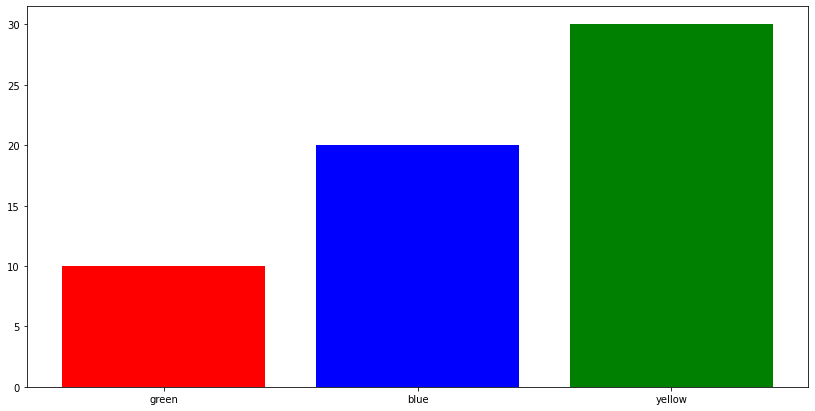

In [33]:
fig, ax = plt.subplots(figsize = (14,7))
x = ["green","blue","yellow"]
y = [10,20,30]
col = ["red","blue","green"]
ax.bar(x,y, color = col)